In [12]:
import import_ipynb
import random
from ExtractShapelets import vector_accer, plot_candidates
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

## Load data label

In [13]:
label = []
for i in range(20800):
    if i in range(0, 12000):
        label.append('walk')
    elif i in range(12800, 14200):
        label.append('jump')
    elif i in range(16500, 19000):
        label.append('skip')
    elif i in range(19000, 20000):
        label.append('walk')
    elif i in range(20000, 20800):
        label.append('skip')
    else:
        label.append('none')

max_float = sys.float_info.max

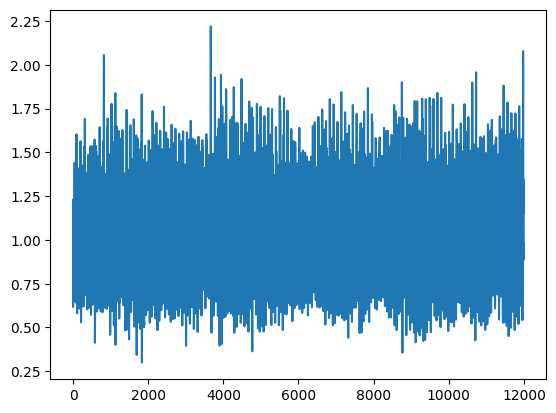

In [3]:
unlabeled_time_series = vector_accer("unlabeled.csv")['vm'][:12000]
plt.plot(unlabeled_time_series)

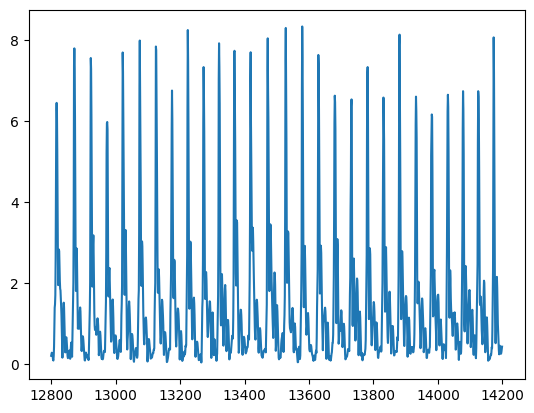

In [4]:
unlabeled_time_series = vector_accer("unlabeled.csv")['vm'][12800:14200]
plt.plot(unlabeled_time_series)

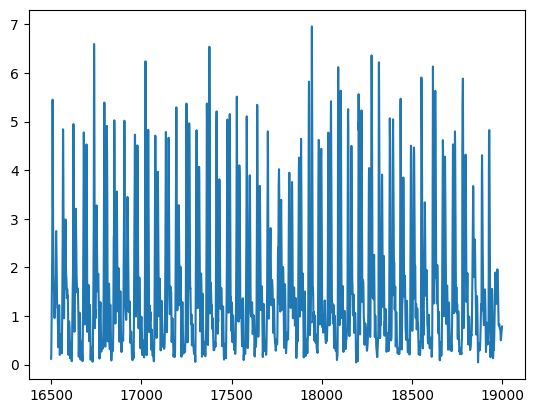

In [5]:
unlabeled_time_series = vector_accer("unlabeled.csv")['vm'][16500:19000]
plt.plot(unlabeled_time_series)

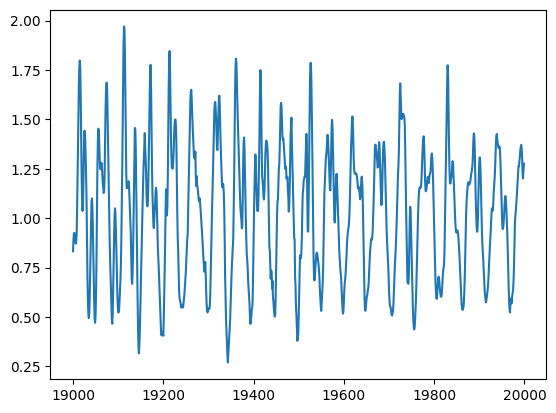

In [6]:
unlabeled_time_series = vector_accer("unlabeled.csv")['vm'][19000:20000]
plt.plot(unlabeled_time_series)

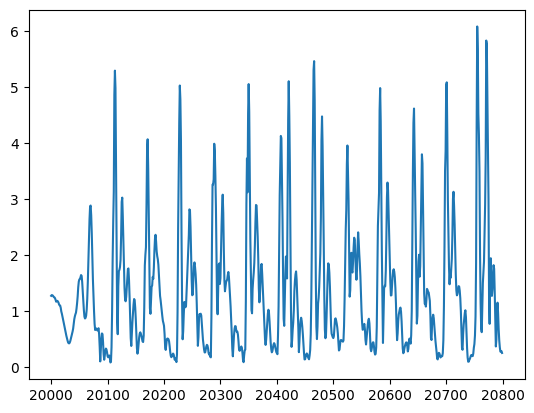

In [7]:
unlabeled_time_series = vector_accer("unlabeled.csv")['vm'][20000:20800]
plt.plot(unlabeled_time_series)

## Decide activity by sliding window

In [20]:
def decide_label(time_series, shapelets_dict, series_length):
    """
    This is a method andomly pick 2000 point in time series to decide its activity
    """
    window_size = int ((len(shapelets_dict['jump']) +  len(shapelets_dict['walk']) + len(shapelets_dict['skip'])) / 3)
    label = ['0'] * series_length
    count_pick = 10000
    while (count_pick > 0):
        print(str(count_pick) + ' is running')
        random_int = random.randint(0, series_length - window_size)
    # for i in range(len(time_series) - window_size + 1):
        window = time_series[random_int : random_int + window_size]
        window_df = pd.DataFrame(window)
        min_distance = max_float
        temp_label = 0
        for name, value in shapelets_dict.items():
            # print(name)
            # print(value)
            # print(window_df)
            distance, _ = fastdtw(window_df, pd.DataFrame(value), dist=euclidean)
            if distance <= min_distance:
                min_distance = distance
                temp_label = name
        label[random_int] = temp_label
        count_pick -= 1
    return label


def count_correct_guess(test_label):
    count = 0
    total = 0
    for i in range(len(label)):
        if test_label[i] != '0':
            total += 1
            if test_label[i] == label[i]:
                count += 1
    return count, total

### Candidate 1 
Skip Representative shapelet

In [21]:
%store -r z_jump_rs
%store -r z_walk_rs
%store -r z_skip_rs

In [22]:
print('--------------Candidate 1 Skip rs----------------------')
unlabeled_time_series = vector_accer("unlabeled.csv")['vm'][:]
shapelets_dict = {}
shapelets_dict['jump'] = z_jump_rs
shapelets_dict['walk'] = z_walk_rs
shapelets_dict['skip'] = z_skip_rs
skip_test_label = decide_label(unlabeled_time_series, shapelets_dict, 20800)
correct, total = count_correct_guess(skip_test_label)
print(correct)
print(total)
skip_rs_accuracy = correct / total
print(skip_rs_accuracy)

--------------Candidate 1 Skip rs----------------------
10000 is running
9999 is running
9998 is running
9997 is running
9996 is running
9995 is running
9994 is running
9993 is running
9992 is running
9991 is running
9990 is running
9989 is running
9988 is running
9987 is running
9986 is running
9985 is running
9984 is running
9983 is running
9982 is running
9981 is running
9980 is running
9979 is running
9978 is running
9977 is running
9976 is running
9975 is running
9974 is running
9973 is running
9972 is running
9971 is running
9970 is running
9969 is running
9968 is running
9967 is running
9966 is running
9965 is running
9964 is running
9963 is running
9962 is running
9961 is running
9960 is running
9959 is running
9958 is running
9957 is running
9956 is running
9955 is running
9954 is running
9953 is running
9952 is running
9951 is running
9950 is running
9949 is running
9948 is running
9947 is running
9946 is running
9945 is running
9944 is running
9943 is running
9942 is running

Barycenter shapelet

In [23]:
print('------------Candidate 1 Barycenter----------------')
%store -r z_barycenter_df
shapelets_dict['jump'] = z_jump_rs
shapelets_dict['walk'] = z_walk_rs
shapelets_dict['skip'] = z_barycenter_df
bary_test_label = decide_label(unlabeled_time_series, shapelets_dict, 20800)
correct, total = count_correct_guess(bary_test_label)
print(correct)
print(total)
bary_accuracy = correct / total
print(bary_accuracy)

------------Candidate 1 Barycenter----------------
10000 is running
9999 is running
9998 is running
9997 is running
9996 is running
9995 is running
9994 is running
9993 is running
9992 is running
9991 is running
9990 is running
9989 is running
9988 is running
9987 is running
9986 is running
9985 is running
9984 is running
9983 is running
9982 is running
9981 is running
9980 is running
9979 is running
9978 is running
9977 is running
9976 is running
9975 is running
9974 is running
9973 is running
9972 is running
9971 is running
9970 is running
9969 is running
9968 is running
9967 is running
9966 is running
9965 is running
9964 is running
9963 is running
9962 is running
9961 is running
9960 is running
9959 is running
9958 is running
9957 is running
9956 is running
9955 is running
9954 is running
9953 is running
9952 is running
9951 is running
9950 is running
9949 is running
9948 is running
9947 is running
9946 is running
9945 is running
9944 is running
9943 is running
9942 is running
9941

Weighted

In [24]:

print('------------Candidate 1 Weighted----------------')
%store -r z_weighted
shapelets_dict['jump'] = z_jump_rs
shapelets_dict['walk'] = z_walk_rs
shapelets_dict['skip'] = z_weighted
weighted_test_label = decide_label(unlabeled_time_series, shapelets_dict, 20800)
correct, total = count_correct_guess(weighted_test_label)
print(correct)
print(total)
weighted_accuracy = correct / total
print(weighted_accuracy)

------------Candidate 1 Weighted----------------
10000 is running
9999 is running
9998 is running
9997 is running
9996 is running
9995 is running
9994 is running
9993 is running
9992 is running
9991 is running
9990 is running
9989 is running
9988 is running
9987 is running
9986 is running
9985 is running
9984 is running
9983 is running
9982 is running
9981 is running
9980 is running
9979 is running
9978 is running
9977 is running
9976 is running
9975 is running
9974 is running
9973 is running
9972 is running
9971 is running
9970 is running
9969 is running
9968 is running
9967 is running
9966 is running
9965 is running
9964 is running
9963 is running
9962 is running
9961 is running
9960 is running
9959 is running
9958 is running
9957 is running
9956 is running
9955 is running
9954 is running
9953 is running
9952 is running
9951 is running
9950 is running
9949 is running
9948 is running
9947 is running
9946 is running
9945 is running
9944 is running
9943 is running
9942 is running
9941 i